# LightGCNPlus Hyperparameter Tuning


### Scope
In this notebook we run experiments to tune the hyperparameters of the LightGCNPlus model. 

### Search Grid
We perform a grid search over the following hyperparameters:
- K: Embedding size.
- L: Number of layers in the message passing mechanism.
- PROJECTIONS: Architecture of the MLP that projects the embedding couples of observed ratings to the output space.

### About the model




# Graph Convolutional Matrix Completion (GC-MC)

In this notebook we implement the GCMC model proposed in the [paper](https://arxiv.org/abs/1706.02263).

#### Architecture
1. Encoder:
    - create 5 bipartite graphs (one for each rating level)
    - for each node, message pass the embeddings of its neighbors
    - concatenate the embeddings of the different rating levels
    - pass the concatenated embeddings through a fully connected layer (decide whether to use act-MLP or just MLP)
2. Decoder:
    - compute probability of each rating level
    - compute final rating as expectation of the rating levels

#### Possible loss functions
- cross entropy: $-\sum_{(i,j) \in \Omega} \sum_{r \in \mathcal{R}} \text{I}\{M_{(i,j)} == r\} \log P(M_{(i,j)} == r)$
- RMSE: $\sqrt{\frac{1}{|\Omega|} \sum_{(i,j) \in \Omega} (M_{(i,j)} - \mathbb{E}[M_{(i,j)}])^2}$

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from train import train_model
from models import LightGCNPlus
from config import DEVICE
from train import train_model
from postprocess import report_training_results
from itertools import product

## 1. Load and Preprocessing

In [2]:
from load import load_train_data
train_df = load_train_data()

In [3]:
from preprocess import preprocess

A_tilde, standardized_train_ratings, train_users, train_items, means, stds, val_users, val_items, orig_val_ratings, standardized_val_ratings = preprocess(train_df)

## 2. Train and Report

In the ideal case one would search over multiple splits of the train and val sets.

In [4]:
# Model and optimizer hyperparameters
INIT_EMBS_STD=0.075
LR=0.1
WEIGHT_DECAY=0.00005
DROPOUT=0.5
ACT_FN = nn.GELU()

# Train loop hyperparameters
EPOCHS = 1
STOP_THRESHOLD=1e-07

# To be searched
# K=28
# L=4
# PROJECTIONS = (4,)

In [5]:
# Grid
ks = [28, 30, 32]
layers = [3, 4]
projections = [(4,), (2,), (1,)]  # (8,4) 

K=28, L=3, C=(4,)
Epoch 0 - Train loss: 1.0014 - Val loss: 1.1884 - Val loss original: 1.2535
Best val loss: 1.2535 at epoch 1
Min training loss: 1.0014
Min validation loss std: 1.1884
Min validation loss orig: 1.2535
Min validation loss at epoch: 0


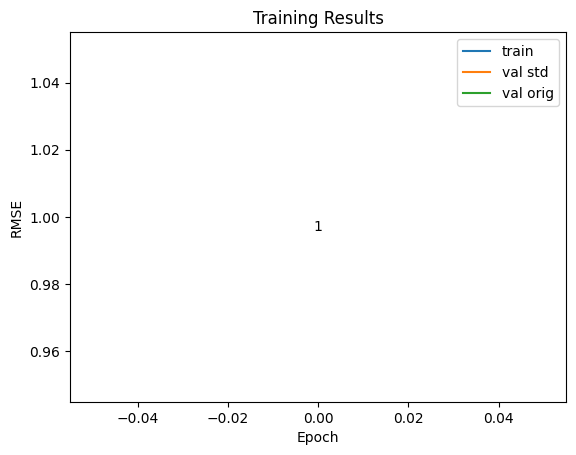

K=28, L=3, C=(2,)
Epoch 0 - Train loss: 1.0055 - Val loss: 1.0618 - Val loss original: 1.1188
Best val loss: 1.1188 at epoch 1
Min training loss: 1.0055
Min validation loss std: 1.0618
Min validation loss orig: 1.1188
Min validation loss at epoch: 0


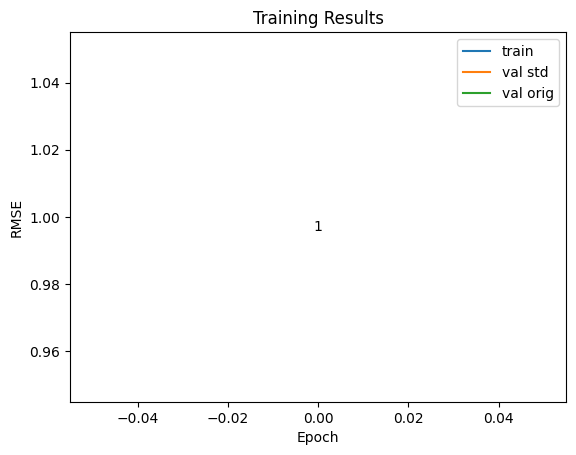

K=28, L=3, C=(1,)
Epoch 0 - Train loss: 1.0229 - Val loss: 1.0262 - Val loss original: 1.0784
Best val loss: 1.0784 at epoch 1
Min training loss: 1.0229
Min validation loss std: 1.0262
Min validation loss orig: 1.0784
Min validation loss at epoch: 0


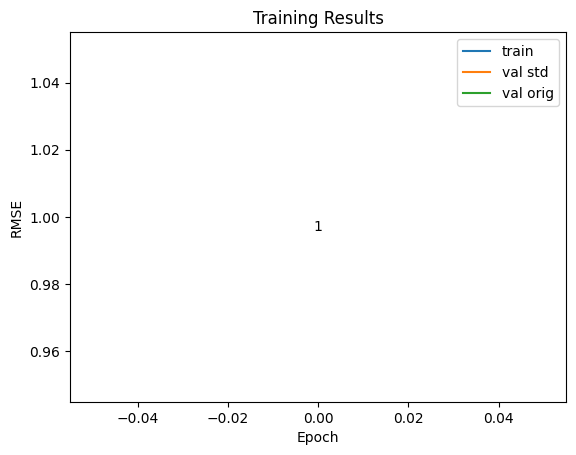

K=28, L=4, C=(4,)
Epoch 0 - Train loss: 1.0009 - Val loss: 1.2743 - Val loss original: 1.3440
Best val loss: 1.3440 at epoch 1
Min training loss: 1.0009
Min validation loss std: 1.2743
Min validation loss orig: 1.344
Min validation loss at epoch: 0


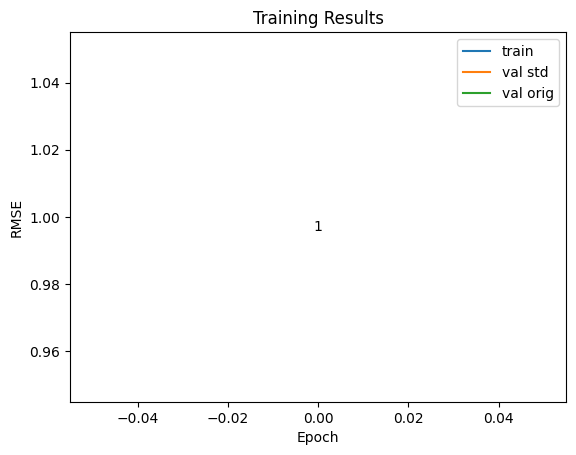

K=28, L=4, C=(2,)
Epoch 0 - Train loss: 1.0064 - Val loss: 1.0773 - Val loss original: 1.1324
Best val loss: 1.1324 at epoch 1
Min training loss: 1.0064
Min validation loss std: 1.0773
Min validation loss orig: 1.1324
Min validation loss at epoch: 0


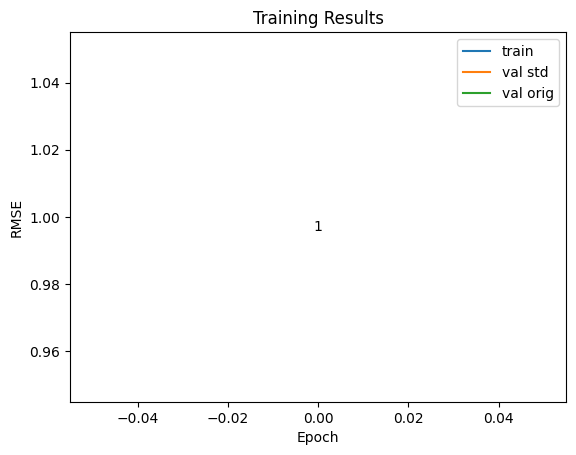

K=28, L=4, C=(1,)
Epoch 0 - Train loss: 1.0055 - Val loss: 1.0424 - Val loss original: 1.0960
Best val loss: 1.0960 at epoch 1
Min training loss: 1.0055
Min validation loss std: 1.0424
Min validation loss orig: 1.096
Min validation loss at epoch: 0


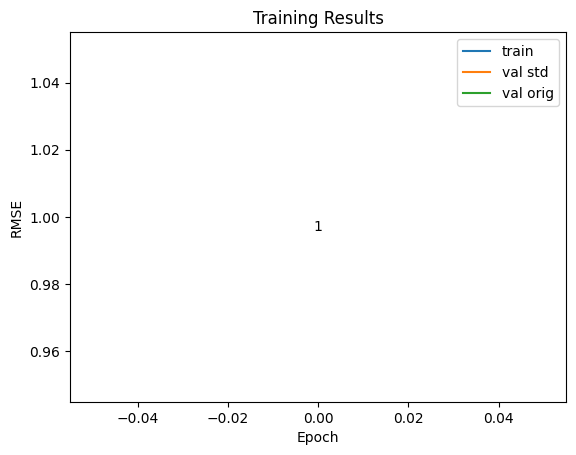

K=30, L=3, C=(4,)
Epoch 0 - Train loss: 1.0068 - Val loss: 1.2142 - Val loss original: 1.2784
Best val loss: 1.2784 at epoch 1
Min training loss: 1.0068
Min validation loss std: 1.2142
Min validation loss orig: 1.2784
Min validation loss at epoch: 0


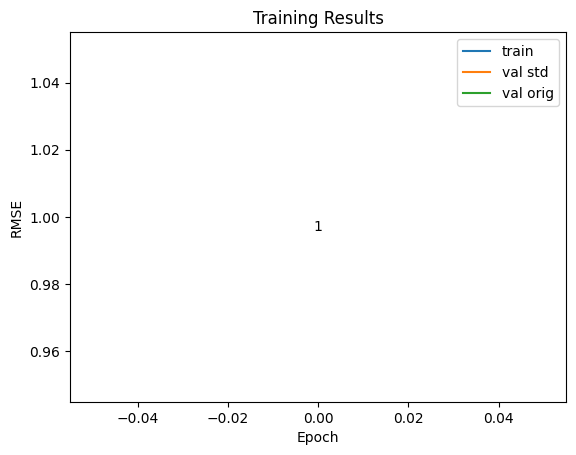

K=30, L=3, C=(2,)
Epoch 0 - Train loss: 1.0116 - Val loss: 1.1306 - Val loss original: 1.1895
Best val loss: 1.1895 at epoch 1
Min training loss: 1.0116
Min validation loss std: 1.1306
Min validation loss orig: 1.1895
Min validation loss at epoch: 0


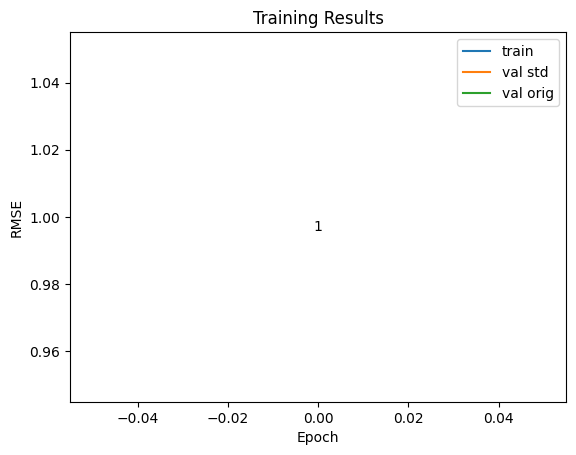

K=30, L=3, C=(1,)
Epoch 0 - Train loss: 1.0086 - Val loss: 1.0385 - Val loss original: 1.0930
Best val loss: 1.0930 at epoch 1
Min training loss: 1.0086
Min validation loss std: 1.0385
Min validation loss orig: 1.093
Min validation loss at epoch: 0


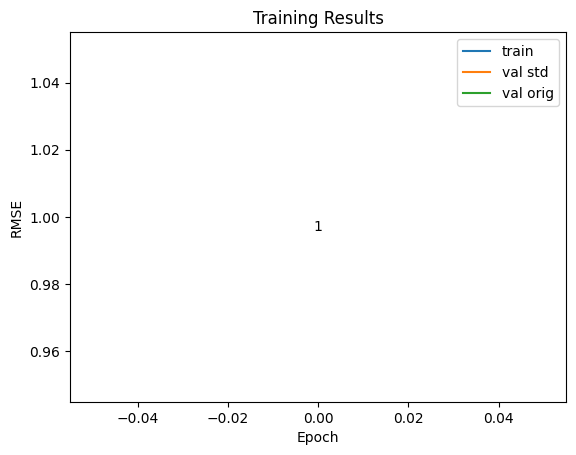

K=30, L=4, C=(4,)
Epoch 0 - Train loss: 1.0006 - Val loss: 1.1667 - Val loss original: 1.2285
Best val loss: 1.2285 at epoch 1
Min training loss: 1.0006
Min validation loss std: 1.1667
Min validation loss orig: 1.2285
Min validation loss at epoch: 0


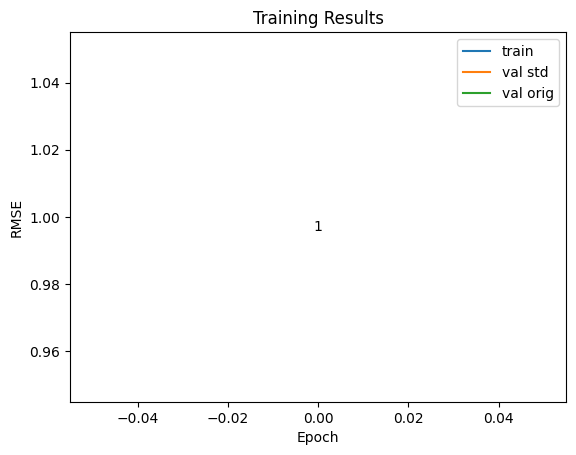

K=30, L=4, C=(2,)
Epoch 0 - Train loss: 1.0001 - Val loss: 1.1472 - Val loss original: 1.2082
Best val loss: 1.2082 at epoch 1
Min training loss: 1.0001
Min validation loss std: 1.1472
Min validation loss orig: 1.2082
Min validation loss at epoch: 0


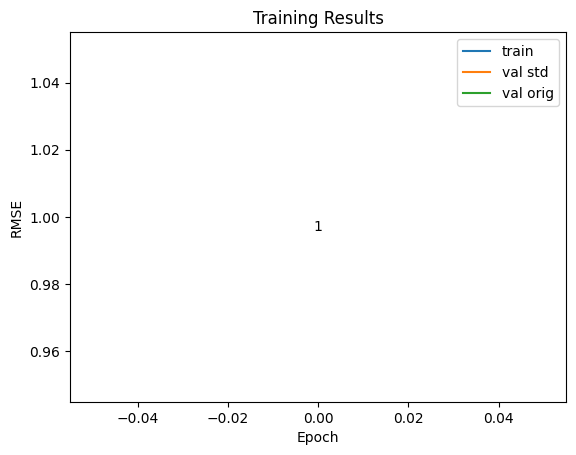

K=30, L=4, C=(1,)
Epoch 0 - Train loss: 1.0303 - Val loss: 1.0331 - Val loss original: 1.0866
Best val loss: 1.0866 at epoch 1
Min training loss: 1.0303
Min validation loss std: 1.0331
Min validation loss orig: 1.0866
Min validation loss at epoch: 0


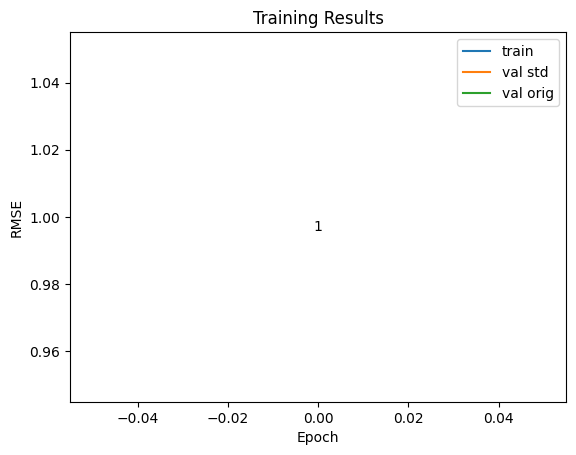

K=32, L=3, C=(4,)
Epoch 0 - Train loss: 1.0004 - Val loss: 1.3265 - Val loss original: 1.4010
Best val loss: 1.4010 at epoch 1
Min training loss: 1.0004
Min validation loss std: 1.3265
Min validation loss orig: 1.401
Min validation loss at epoch: 0


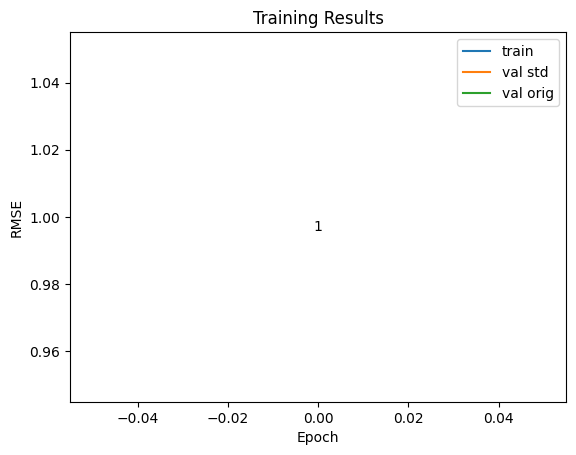

K=32, L=3, C=(2,)
Epoch 0 - Train loss: 1.0069 - Val loss: 1.0949 - Val loss original: 1.1551
Best val loss: 1.1551 at epoch 1
Min training loss: 1.0069
Min validation loss std: 1.0949
Min validation loss orig: 1.1551
Min validation loss at epoch: 0


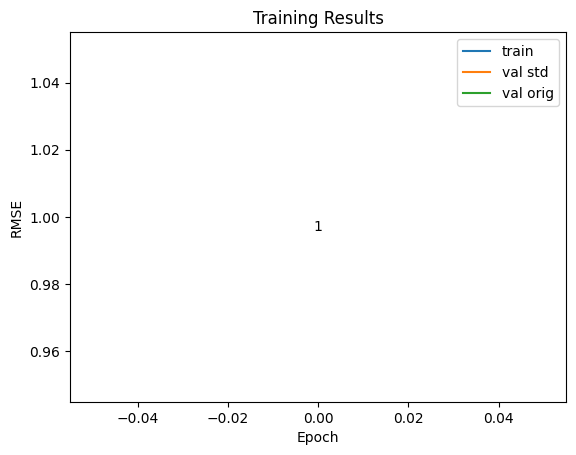

K=32, L=3, C=(1,)
Epoch 0 - Train loss: 1.0141 - Val loss: 1.0376 - Val loss original: 1.0915
Best val loss: 1.0915 at epoch 1
Min training loss: 1.0141
Min validation loss std: 1.0376
Min validation loss orig: 1.0915
Min validation loss at epoch: 0


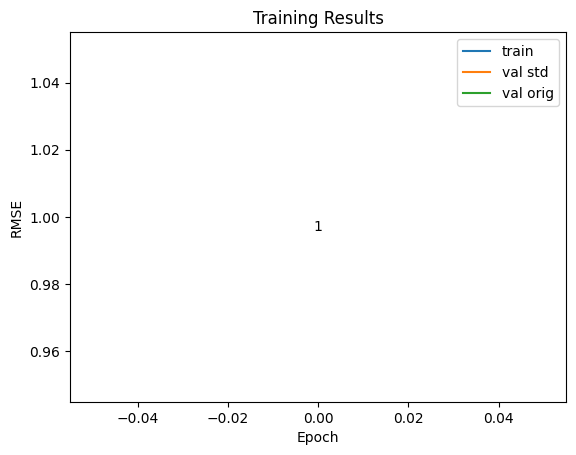

K=32, L=4, C=(4,)
Epoch 0 - Train loss: 1.0056 - Val loss: 1.1592 - Val loss original: 1.2215
Best val loss: 1.2215 at epoch 1
Min training loss: 1.0056
Min validation loss std: 1.1592
Min validation loss orig: 1.2215
Min validation loss at epoch: 0


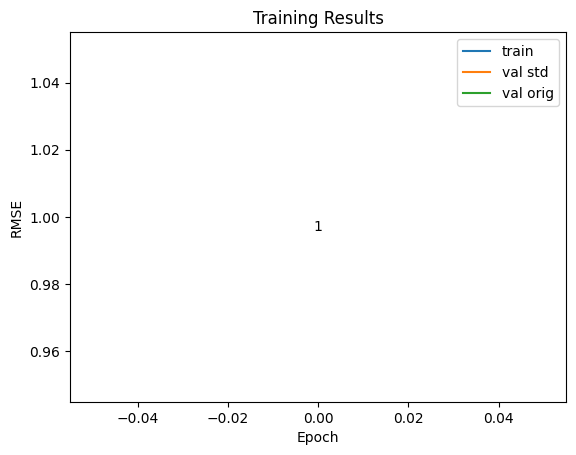

K=32, L=4, C=(2,)
Epoch 0 - Train loss: 1.0191 - Val loss: 1.0397 - Val loss original: 1.0934
Best val loss: 1.0934 at epoch 1
Min training loss: 1.0191
Min validation loss std: 1.0397
Min validation loss orig: 1.0934
Min validation loss at epoch: 0


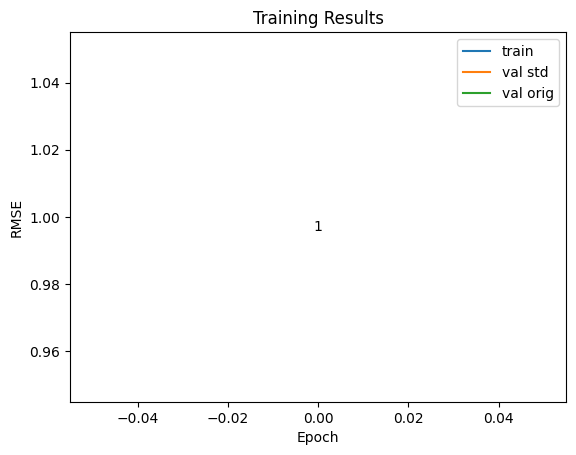

K=32, L=4, C=(1,)
Epoch 0 - Train loss: 1.0081 - Val loss: 1.0733 - Val loss original: 1.1299
Best val loss: 1.1299 at epoch 1
Min training loss: 1.0081
Min validation loss std: 1.0733
Min validation loss orig: 1.1299
Min validation loss at epoch: 0


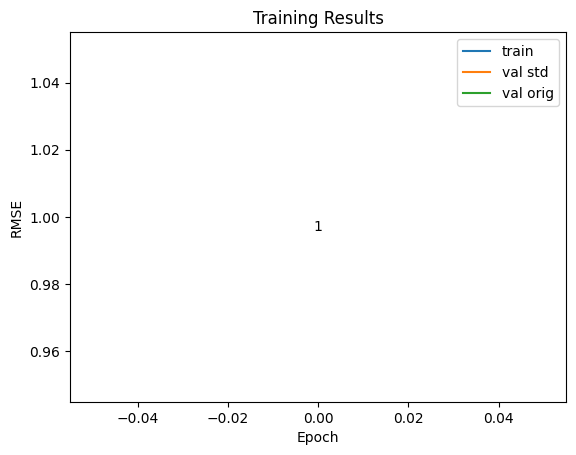

Best hyperparameters:
(28, 3, (1,))
Best val loss:
1.0783767700195312


In [6]:
# Tuning LightGCNPlus
results = {
    "min_val_losses": [],
    "params": []
}
for K in ks:
    for L in layers:
        for C in projections:
            model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, C).to(DEVICE)
            optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
            loss_fn = nn.MSELoss()
            print(f"K={K}, L={L}, C={C}")
            train_rmse, val_rmse_std, val_rmse_orig = train_model(model, optimizer, loss_fn, train_users, train_items, standardized_train_ratings, val_users, val_items, orig_val_ratings, standardized_val_ratings, means, stds, EPOCHS, STOP_THRESHOLD, False, verbosity=50)
            report_training_results(train_rmse, val_rmse_std, val_rmse_orig)
            
            results["min_val_losses"].append(min(val_rmse_orig))
            results["params"].append((K, L, C))

# Report best hyperparameters
best_idx = np.argmin(results["min_val_losses"])
print("Best hyperparameters:")
print(results["params"][best_idx])
print("Best val loss:")
print(results["min_val_losses"][best_idx])

## 3. Retrain model on best hyperparam combo

In [9]:
# Retrain best model 
K, L, C = results["params"][best_idx]
K, L, C = (28, 3, (4,))

model = LightGCNPlus(A_tilde, ACT_FN, K, L, INIT_EMBS_STD, DROPOUT, C).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
loss_fn = nn.MSELoss()

train_rmse, val_rmse_std, val_rmse_orig = train_model(model, optimizer, loss_fn, train_users, train_items, standardized_train_ratings, val_users, val_items, orig_val_ratings, standardized_val_ratings, means, stds, EPOCHS, STOP_THRESHOLD, True, verbosity=1)
report_training_results(train_rmse, val_rmse_std, val_rmse_orig)

Epoch 0 - Train loss: 1.0002 - Val loss: 1.2384 - Val loss original: 1.3054
Epoch 1 - Train loss: 1.2276 - Val loss: 1.0664 - Val loss original: 1.1260


## 4. Post-Process and create submission

In [8]:
from postprocess import postprocess
postprocess(LightGCNPlus, means, stds)

TypeError: load_best_val_model() missing 1 required positional argument: 'model_class'